# Random Forest
#### A) Used in both classification and regression problems
#### B) Most important feature is that it can handle both categorical variales for clssification and contineous variables for regression (better results for classification problems.)
#### C) Bootstraping the data and using aggregate to make decision is called as Bagging
## Ensemble Learning
#### 1) Ensemble simply means combining multiple models 
## Steps to bulid RFC
#### 1) Create a bootstrap dataset : Just randomly select samples from dataset, and we are allowed to pick the same sample more than once
#### 2) Create a decision tree using bootstrap dataset,but only use random subset of variables/Features
#### 3) Repeat steps one ande two againg to build a random forest structure 
## Estimating accquracy of RFC
#### 1) As we allowed duplicate entries in our boorstrap dataset, Some of the entries from our original dataset were not included in that called as out-of-bag-dataset
#### 2) To find out accuracy of our classifier we run data from out-of-bag-samples and then cross run its output against our RFC to see that is have correctly identified the data or not
#### 3) The porportion of out-of-bag-samples that were incorrectly classified as called as "Out-of-Bag-Error"
## Hyper_Parameters
#### 1) n_estimators :- Number of tress algorithm build before aggeration of prediction
#### 2) max_features :- maximus number of features RF consider for splitting a node
#### 3) mini_Sample_leaf :- minimum number of leaves required to split internal node

In [1]:
#https://www.kaggle.com/rakeshrau/social-network-ads

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('social_ads.csv')

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
df.shape

(400, 5)

### Number of MALE and FEMALE in dataset

In [8]:
df.Gender.value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [9]:
sns.set_style('darkgrid')

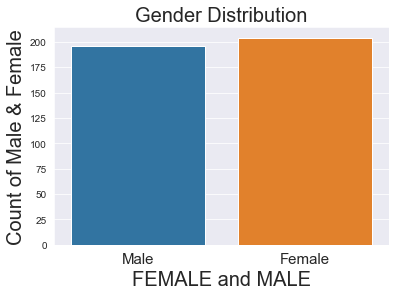

In [10]:
p1 = sns.countplot('Gender',data=df,)
p1.set_xlabel("FEMALE and MALE", fontsize = 20)
p1.set_ylabel("Count of Male & Female", fontsize = 20)
p1.set_title("Gender Distribution", fontsize = 20)
p1.set_xticklabels(labels=["Male","Female"],fontsize=15);

### Age distribution

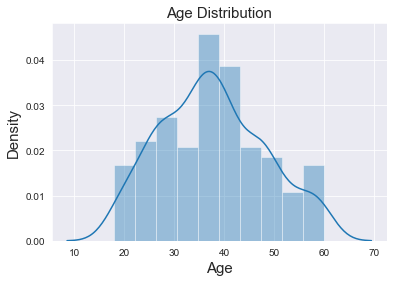

In [11]:
p2 = sns.distplot(a=df['Age'])
p2.set_xlabel("Age", fontsize = 15)
p2.set_ylabel("Density", fontsize = 15)
p2.set_title("Age Distribution", fontsize = 15);

### Male and Female age distribution

In [12]:
male= df[df.Gender=='Male'].Age
female= df[df.Gender=='Female'].Age

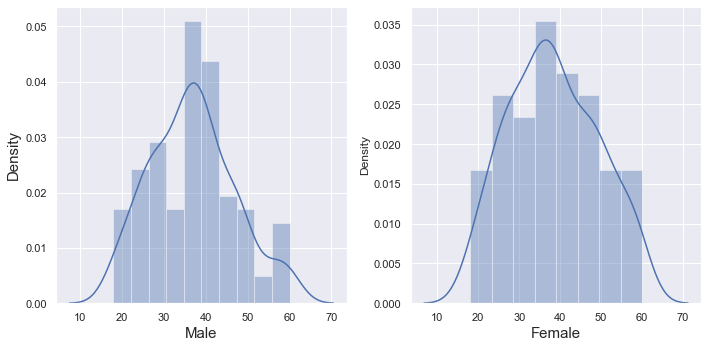

In [32]:
sns.set(rc={'figure.figsize':(10,5)})
fig, axes = plt.subplots(1,2)
sns.distplot(male,ax=axes[0])
sns.distplot(female,ax=axes[1])
axes[0].set_xlabel("Male", fontsize = 15)
axes[1].set_xlabel("Female", fontsize = 15)
axes[0].set_ylabel("Density", fontsize = 15)
plt.tight_layout();

In [14]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### Finding relation between Age and Salary by Gender

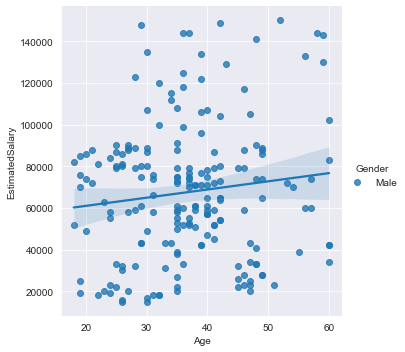

In [15]:
sns.lmplot(x='Age',y='EstimatedSalary',hue='Gender',hue_order=['Male'],data=df);

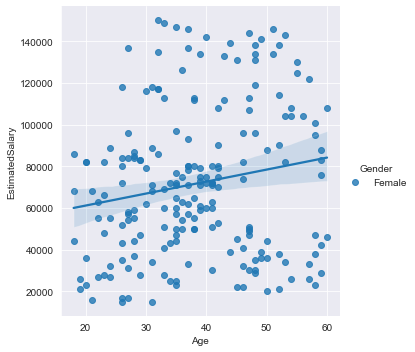

In [16]:
sns.lmplot(x='Age',y='EstimatedSalary',hue='Gender',hue_order=['Female'],data=df);

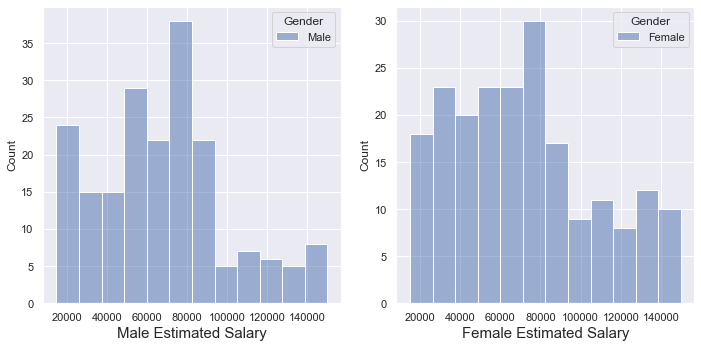

In [51]:
fig, axes = plt.subplots(1,2)
sns.set(rc={'figure.figsize':(10,5)})
sns.histplot(x='EstimatedSalary',hue='Gender',hue_order=['Male'],data=df,ax=axes[0])
sns.histplot(x='EstimatedSalary',hue='Gender',hue_order=['Female'],data=df,ax=axes[1])
axes[0].set_xlabel("Male Estimated Salary", fontsize = 15)
axes[1].set_xlabel("Female Estimated Salary", fontsize = 15)
plt.tight_layout();

### Purchased percentage

In [52]:
df.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

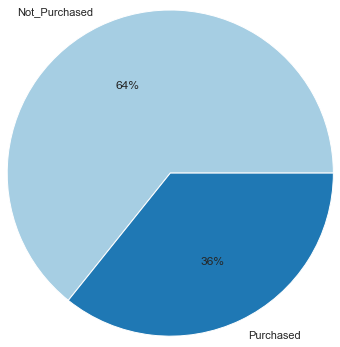

In [73]:
color = sns.color_palette("Paired")
plt.pie(df.Purchased.value_counts(), labels = ['Not_Purchased','Purchased'],colors = color,  autopct='%.0f%%',radius=1.5)
plt.show()

In [67]:
male_purchased = df[df.Gender=='Male'].Purchased.value_counts()
female_purchased = df[df.Gender=='Female'].Purchased.value_counts()

### Percentage of Male and Female purchased

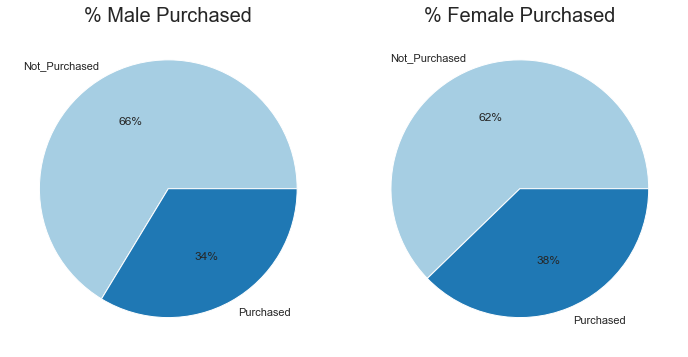

In [97]:
fig, axes = plt.subplots(1,2)
axes[0].pie(male_purchased, labels = ['Not_Purchased','Purchased'],colors = color,  autopct='%.0f%%')
axes[1].pie(female_purchased, labels = ['Not_Purchased','Purchased'],colors = color,  autopct='%.0f%%')
axes[0].set_title("% Male Purchased", fontsize = 20,loc='center')
axes[1].set_title("% Female Purchased", fontsize = 20,loc='center')
plt.tight_layout();

In [98]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [103]:
df.drop(columns=['User ID'],axis =1,inplace=True)

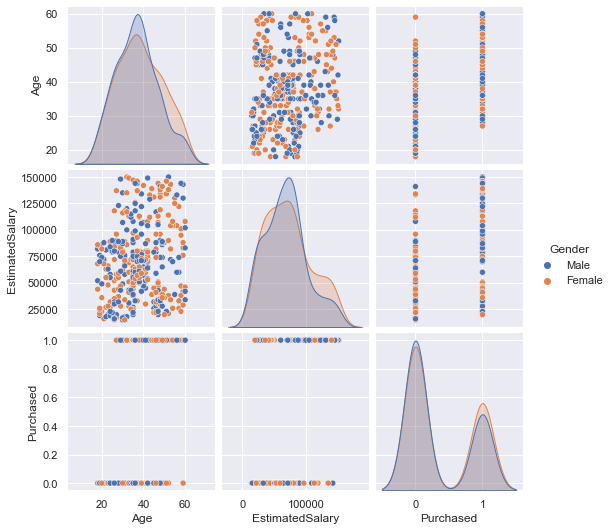

In [104]:
sns.pairplot(df,hue='Gender');

### Changing values for Male : 1 and Female : 0

In [114]:
df.Gender[df.Gender == 'Male'] = 1
df.Gender[df.Gender == 'Female'] = 0

In [115]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [116]:
X = df.drop(columns = ['Purchased'])
y = df['Purchased']

In [122]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [123]:
sc = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Using Decision Tree

In [124]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
model = DecisionTreeClassifier(random_state=54,)
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=54)

In [125]:
model.score(X_test,y_test)

0.85

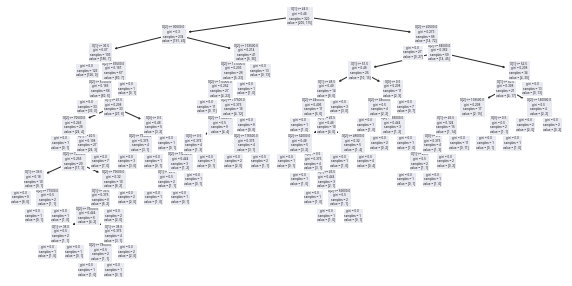

In [126]:
tree.plot_tree(clf2);

In [127]:
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_1 <= 44.50
|   |--- feature_2 <= 90500.00
|   |   |--- feature_1 <= 36.50
|   |   |   |--- class: 0
|   |   |--- feature_1 >  36.50
|   |   |   |--- feature_2 <= 83500.00
|   |   |   |   |--- feature_2 <= 67500.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_2 >  67500.00
|   |   |   |   |   |--- feature_1 <= 41.50
|   |   |   |   |   |   |--- feature_2 <= 70500.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_2 >  70500.00
|   |   |   |   |   |   |   |--- feature_1 <= 40.50
|   |   |   |   |   |   |   |   |--- feature_2 <= 74500.00
|   |   |   |   |   |   |   |   |   |--- feature_1 <= 39.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_1 >  39.50
|   |   |   |   |   |   |   |   |   |   |--- feature_2 <= 71500.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- feature_2 >  71500.00
|   |   |   |   |   |   |   |  

## Using Random Forest

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.21, random_state=42)
rf =  RandomForestClassifier(n_estimators= 100,n_jobs= 2)
rf.fit(X_train,y_train)

RandomForestClassifier(n_jobs=2)

In [130]:
rf.score(X_train,y_train)

0.9968354430379747

In [131]:
rf.score(X_test,y_test)

0.8928571428571429

In [132]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [133]:
y_pred = clf.predict(X_test)

## Accuracy Score
### True Positive + True Negative +False Positive + False Negative

In [134]:
print(accuracy_score(y_test, y_pred))

0.8809523809523809


In [136]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[48,  6],
       [ 4, 26]], dtype=int64)

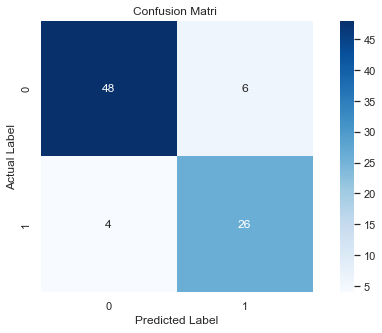

In [137]:
sns.heatmap(conf_mat, annot=True, square=True, fmt='g', cmap="Blues")
plt.title('Confusion Matri ')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()